# Tugas Besar IF2220 Probabilitas dan Statistika
## Penarikan Kesimpulan dan Pengujian Hipotesis

Dibuat oleh : 
* Lyora Felicya (13520073)
* Claudia (13520076)

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

col_names = ["id", "pH", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "OrganicCarbon", "Trihalomethanes", "Turbidity", "Potability"]
df = pd.read_csv("water_potability.csv", names = col_names)
df

,id,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
0,1,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,2,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,3,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,4,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,5,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...,...
2005,2006,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833,1
2006,2007,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
2007,2008,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
2008,2009,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1


In [45]:
df.dtypes

id                   int64
pH                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
OrganicCarbon      float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [46]:
df.isnull().sum()

id                 0
pH                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
OrganicCarbon      0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Nomor 1
Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat
numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum,
maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

In [47]:
describe_df = df.describe()

# Membuat dictionary
water = {}
water["Kolom"] = []
water["Mean"] = []
water["Median"] = []
water["Modus"] = []
water["Std"] = []
water["Var"] = []
water["Range"] = []
water["Min"] = []
water["Max"] = []
water["Q1"] = []
water["Q2"] = []
water["Q3"] = []
water["IQR"] = []
water["Skew"] = []
water["Kurtosis"] = []

for column in describe_df:
    water["Kolom"].append(column)
    water["Mean"].append(describe_df[column]["mean"])
    water["Median"].append(df.median()[column])
    water["Modus"].append(df.mode("index")[column][0])
    water["Std"].append(describe_df[column]["std"])    
    water["Var"].append(df.var()[column])
    water["Range"].append(describe_df[column]["max"] - describe_df[column]["min"])
    water["Min"].append(describe_df[column]["min"])   
    water["Max"].append(describe_df[column]["max"])    
    water["Q1"].append(describe_df[column]["25%"])   
    water["Q2"].append(describe_df[column]["50%"]) 
    water["Q3"].append(describe_df[column]["75%"])   
    water["IQR"].append(describe_df[column]["75%"] - describe_df[column]["25%"])
    water["Skew"].append(df.skew()[column])
    water["Kurtosis"].append(df.kurtosis()[column])


dataframe_new = pd.DataFrame(water, index = [i for i in range(1,12)])
dataframe_new

,Kolom,Mean,Median,Modus,Std,Var,Range,Min,Max,Q1,Q2,Q3,IQR,Skew,Kurtosis
1,id,1005.500000,1005.500000,1.000000,580.381340,3.368425e+05,2009.000000,1.000000,2010.000000,503.250000,1005.500000,1507.750000,1004.500000,0.000000,-1.200000
2,pH,7.087193,7.029490,0.227499,1.572803,2.473709e+00,13.772501,0.227499,14.000000,6.090785,7.029490,8.053006,1.962221,0.048535,0.626904
3,Hardness,195.969209,197.203525,73.492234,32.643166,1.065576e+03,243.845890,73.492234,317.338124,176.740657,197.203525,216.447589,39.706932,-0.085321,0.525480
4,Solids,21904.673439,20926.882155,320.942611,8625.397911,7.439749e+07,56167.729801,320.942611,56488.672413,15614.412962,20926.882155,27170.534649,11556.121687,0.591011,0.337320
5,Chloramines,7.134322,7.142014,1.390871,1.585214,2.512904e+00,11.736129,1.390871,13.127000,6.138326,7.142014,8.109933,1.971607,0.013003,0.549782
6,Sulfate,333.211376,332.214113,129.000000,41.211111,1.698356e+03,352.030642,129.000000,481.030642,307.626986,332.214113,359.268147,51.641161,-0.045728,0.786854
7,Conductivity,426.476708,423.438372,201.619737,80.701872,6.512792e+03,551.722883,201.619737,753.342620,366.619219,423.438372,482.209772,115.590553,0.268012,-0.237206
8,OrganicCarbon,14.357940,14.323286,2.200000,3.325770,1.106075e+01,24.806707,2.200000,27.006707,12.122530,14.323286,16.683562,4.561031,-0.020220,0.031018
9,Trihalomethanes,66.400717,66.482041,8.577013,16.081109,2.586021e+02,115.422987,8.577013,124.000000,55.949993,66.482041,77.294613,21.344620,-0.051383,0.223017
10,Turbidity,3.969497,3.967374,1.450000,0.780471,6.091350e-01,5.044749,1.450000,6.494749,3.442882,3.967374,4.514663,1.071781,-0.032266,-0.049831


## Nomor 2
Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap
kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot
tersebut.

### id

<AxesSubplot:xlabel='id', ylabel='Count'>

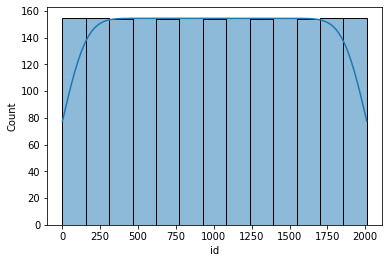

In [48]:
sns.histplot(data = df, x="id", kde=True)

<AxesSubplot:xlabel='id'>

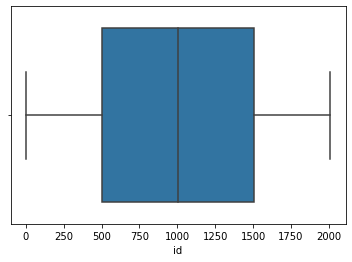

In [49]:
sns.boxplot(x = df["id"])

### pH

<AxesSubplot:xlabel='pH', ylabel='Count'>

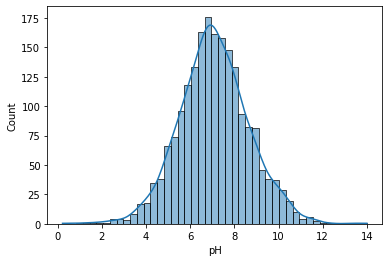

In [50]:
sns.histplot(data = df, x="pH", kde=True)

<AxesSubplot:xlabel='pH'>

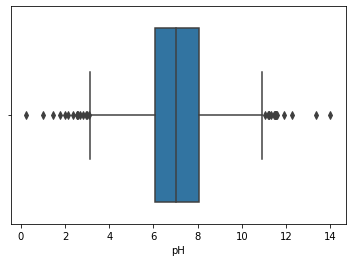

In [51]:
sns.boxplot(x = df["pH"])

### Hardness

<AxesSubplot:xlabel='Hardness', ylabel='Count'>

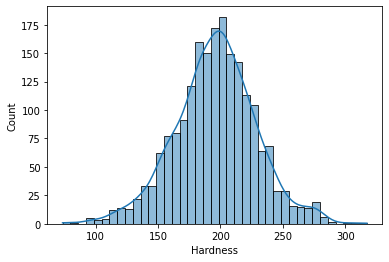

In [52]:
sns.histplot(data = df, x = "Hardness", kde=True)

<AxesSubplot:xlabel='Hardness'>

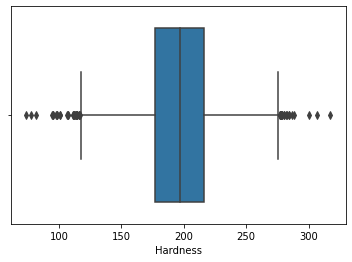

In [53]:
sns.boxplot(x = df["Hardness"])

### Solids

<AxesSubplot:xlabel='Solids', ylabel='Count'>

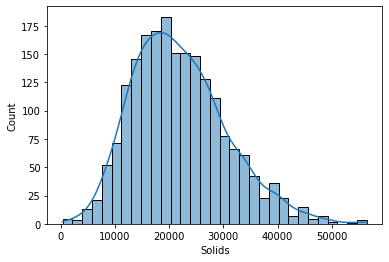

In [54]:
sns.histplot(data = df, x = "Solids", kde=True)

<AxesSubplot:xlabel='Solids'>

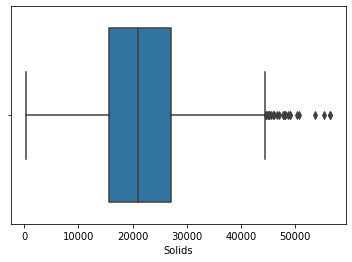

In [55]:
sns.boxplot(x = df["Solids"])

### Chloramines

<AxesSubplot:xlabel='Chloramines', ylabel='Count'>

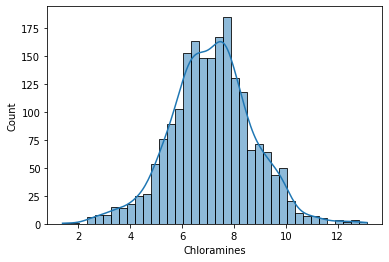

In [56]:
sns.histplot(data = df, x = "Chloramines", kde=True)

<AxesSubplot:xlabel='Chloramines'>

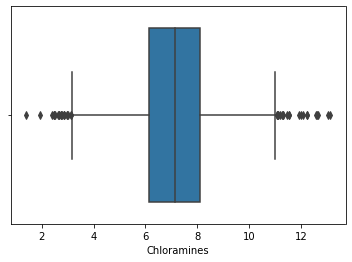

In [57]:
sns.boxplot(x = df["Chloramines"])

### Sulfate

<AxesSubplot:xlabel='Sulfate', ylabel='Count'>

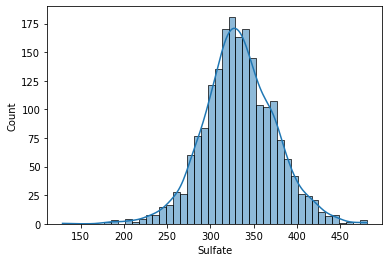

In [58]:
sns.histplot(data = df, x = "Sulfate", kde=True)

<AxesSubplot:xlabel='Sulfate'>

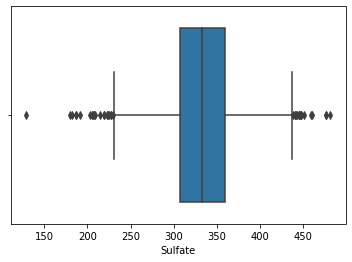

In [59]:
sns.boxplot(x = df["Sulfate"])

### Conductivity

<AxesSubplot:xlabel='Conductivity', ylabel='Count'>

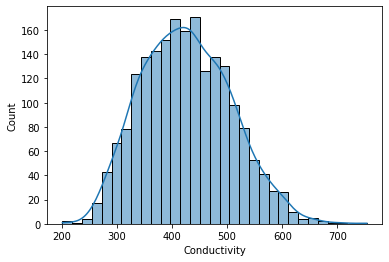

In [60]:
sns.histplot(data = df, x = "Conductivity", kde=True)

<AxesSubplot:xlabel='Conductivity'>

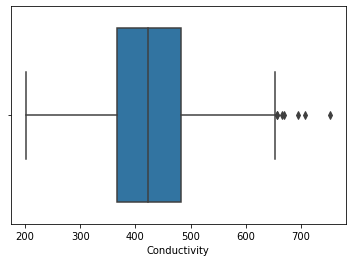

In [61]:
sns.boxplot(x = df["Conductivity"])

### OrganicCarbon

<AxesSubplot:xlabel='OrganicCarbon', ylabel='Count'>

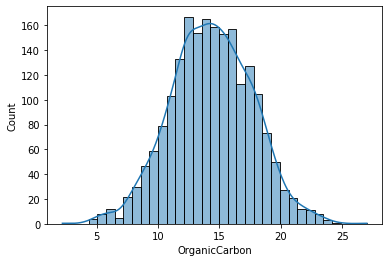

In [62]:
sns.histplot(data = df, x = "OrganicCarbon", kde=True)

<AxesSubplot:xlabel='OrganicCarbon'>

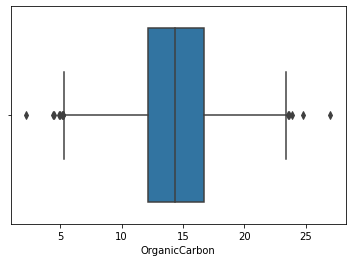

In [63]:
sns.boxplot(x = df["OrganicCarbon"])

### Trihalomethanes

<AxesSubplot:xlabel='Trihalomethanes', ylabel='Count'>

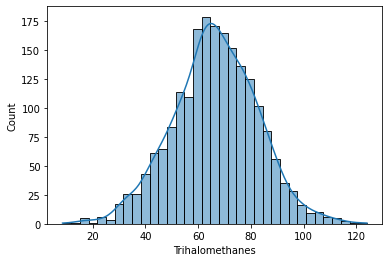

In [64]:
sns.histplot(data = df, x = "Trihalomethanes", kde=True)

<AxesSubplot:xlabel='Trihalomethanes'>

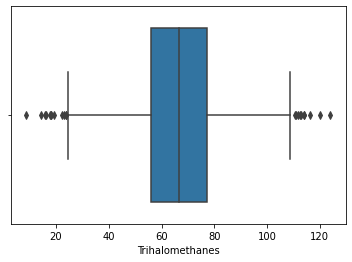

In [65]:
sns.boxplot(x = df["Trihalomethanes"])

### Turbidity

<AxesSubplot:xlabel='Turbidity', ylabel='Count'>

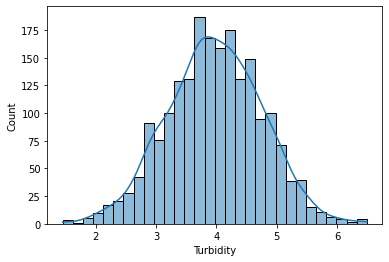

In [66]:
sns.histplot(data = df, x = "Turbidity", kde=True)

<AxesSubplot:xlabel='Turbidity'>

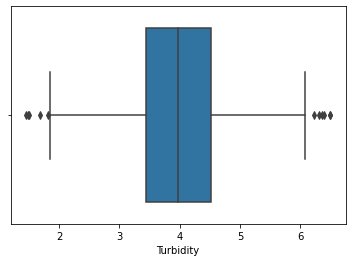

In [67]:
sns.boxplot(x = df["Turbidity"])

### Portability

<AxesSubplot:xlabel='Potability', ylabel='Count'>

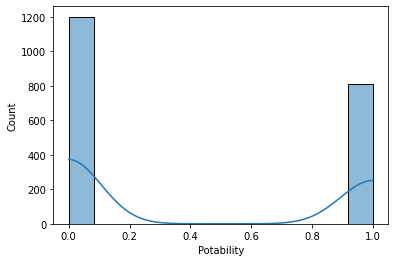

In [68]:
sns.histplot(data = df, x = "Potability", kde=True)

<AxesSubplot:xlabel='Potability'>

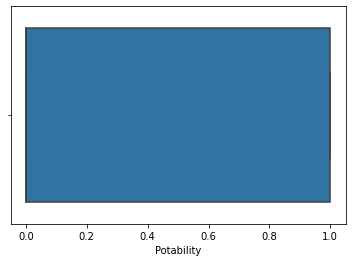

In [69]:
sns.boxplot(x = df["Potability"])

## Nomor 3
Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test
yang dikaitkan dengan histogram plot.

#### Penjelasan D’Agostino’s and Pearson’s Omnibus Test Of Normality
Normality test dilakukan dengan menggunakan fungsi ```normaltest``` dari library scipy dan akan divisualisaasikan dengan ```seaborn.histplot()```. Apabila hasil tes menyimpulkan kolom berdistribusi normal, maka pada histogram plot akan tergambar bell-shaped curve (kurva simetris).

Tes D'Agostino-Pearson, atau disebut juga Omnibus D'Agostino, dilakukan dengan menggabungkan hasil tes skewness dan kurtosis D'Agostino. Rumusnya diberikan sebagai berikut:$$K^2 = Z_s^2 + Z_k^2$$

$Z_s$ merupakan hasil dari tes Skewness Agostino dan $Z_k$ merupakan hasil tes Kurtosis Agostino. $K^2$ diaproksimasi terdistribusi secara $\chi^2$ (chi-squared) dengan 2 degrees of freedom (derajat kebebasan 2).

Hipotesis null $H_0$ dalam test ini adalah data pada kolom tertentu terdistribusi secara normal.
Apabila nilai $p > \alpha$, maka $H_0$ akan diterima, sehingga kolom dapat disimpulkan memiliki distribusi normal.
Sebaliknya apabila nilai $p \leq \alpha$, maka $H_0$ ditolak, sehingga kolom yang bersangkutan dapat disimpulkan tidak memiliki distribusi normal.

Normality test dibawah ini akan menghasilkan dua buah output, yaitu nilai p-value yang didapat serta kesimpulan apakah hipotesis 0 diterima atau ditolak.

In [70]:
from scipy import stats

def normalityTest(df):
    k2, p = stats.normaltest(df)
    print("P-value yang didapat sebesar", p)
    if (p < 0.05):
        print("Hipotesis nol ditolak. Data tidak terdistribusi normal.")
    else:
        print("Hipotesis nol diterima. Data terdistribusi normal.")
    sns.histplot(data = df, x = df, kde=True, stat="density", linewidth=0)

### pH

P-value yang didapat sebesar 2.6514813346797777e-05
Hipotesis nol ditolak. Data tidak terdistribusi normal.


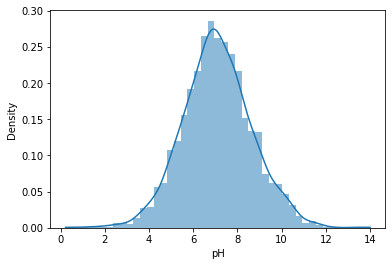

In [71]:
normalityTest(df["pH"])

### Hardness

P-value yang didapat sebesar 0.00013442428699593753
Hipotesis nol ditolak. Data tidak terdistribusi normal.


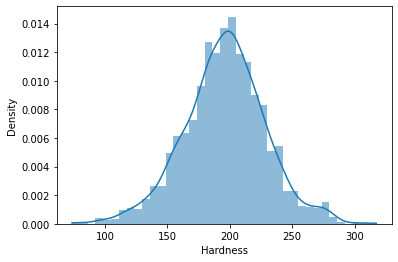

In [72]:
normalityTest(df["Hardness"])

### Solids

P-value yang didapat sebesar 2.0796613688739523e-24
Hipotesis nol ditolak. Data tidak terdistribusi normal.


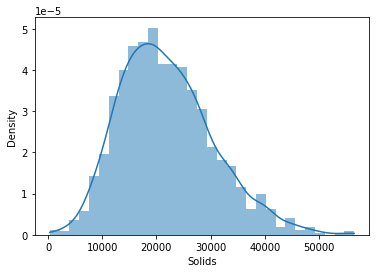

In [73]:
normalityTest(df["Solids"])

### Chloramines

P-value yang didapat sebesar 0.0002504831654753917
Hipotesis nol ditolak. Data tidak terdistribusi normal.


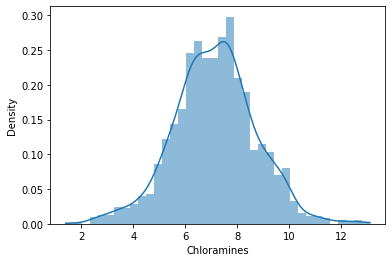

In [74]:
normalityTest(df["Chloramines"])

### Sulfate

P-value yang didapat sebesar 4.4255936678013136e-07
Hipotesis nol ditolak. Data tidak terdistribusi normal.


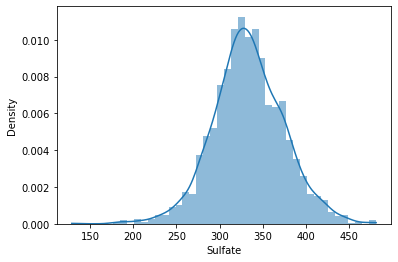

In [75]:
normalityTest(df["Sulfate"])

### Conductivity

P-value yang didapat sebesar 4.39018078287845e-07
Hipotesis nol ditolak. Data tidak terdistribusi normal.


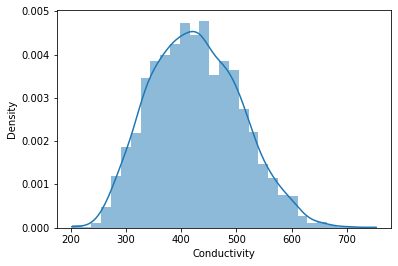

In [76]:
normalityTest(df["Conductivity"])

### OrganicCarbon

P-value yang didapat sebesar 0.8825496581408284
Hipotesis nol diterima. Data terdistribusi normal.


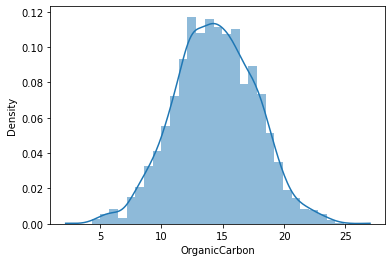

In [77]:
normalityTest(df["OrganicCarbon"])

### Trihalomethanes

P-value yang didapat sebesar 0.1043598441875204
Hipotesis nol diterima. Data terdistribusi normal.


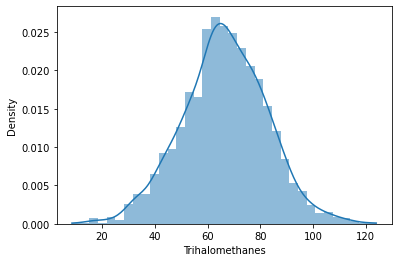

In [78]:
normalityTest(df["Trihalomethanes"])

### Turbidity

P-value yang didapat sebesar 0.7694717369961169
Hipotesis nol diterima. Data terdistribusi normal.


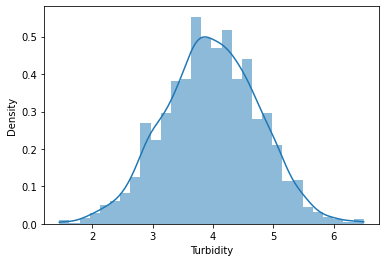

In [79]:
normalityTest(df["Turbidity"])

### Portability

P-value yang didapat sebesar 0.0
Hipotesis nol ditolak. Data tidak terdistribusi normal.


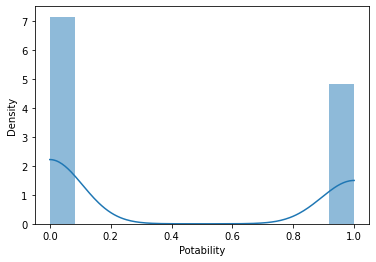

In [80]:
normalityTest(df["Potability"])

## Nomor 4
Melakukan test hipotesis 1 sampel, dengan menuliskan 6 langkah testing dan menampilkan
juga boxplotnya untuk kolom/bagian yang bersesuaian.

In [81]:
import scipy.stats as st

a. Nilai Rata-rata pH di atas 7?

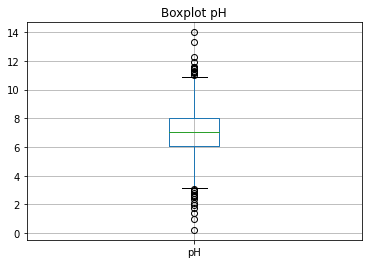

In [82]:
ax = df.boxplot(["pH"])
ax.set_title("Boxplot pH")
plt.show()

In [83]:
H_0 = "rata-rata kolom pH bernilai 7"
H_1 = "rata-rata kolom pH bernilai lebih besar dari 7"

print("Langkah 1: Hipotesis H_0 yang kami ambil ialah mu_0 = 7")
print("Langkah 2: Hipotesis H_1 yang kami ambil ialah mu_0 > 7")
print("Langkah 3: Tingkat signifikan a yang kami ambil ialah 0.05")
a = 0.05
print("Langkah 4: Uji statistik yang sesuai ialah dengan mengambil z = (mean - mu_0)/(std/(n**0.5)), karena mean dan std populasi diketahui. Serta karena H_1 ialah mu_0 > 4700, maka daerah kritis ialah z > z_a = z_0.95")
z_a = st.norm.ppf(.95)
print("z_a =",z_a)
def isKritis(p, a):
    return p < a
print("Langkah 5:")
mu_0 = 7
mean = df["pH"].mean()
std = df["pH"].std()
n = len(df["pH"])
print("xbar =", mean, ", std =", std, ", n =", n)
z = (mean - mu_0)/(std/(n**0.5))
print("z =",z)
p = 1 - st.norm.cdf(z)
print("p-value =", p)
print("Langkah 6:")
if isKritis(p, a):
    print("Karena berada dalam daerah kritis, hipotesis H_0 ditolak sehingga " + H_1)
else:
    print("Karena tidak berada dalam daerah kritis, hipotesis H_0 diterima sehingga " + H_0)

Langkah 1: Hipotesis H_0 yang kami ambil ialah mu_0 = 7
Langkah 2: Hipotesis H_1 yang kami ambil ialah mu_0 > 7
Langkah 3: Tingkat signifikan a yang kami ambil ialah 0.05
Langkah 4: Uji statistik yang sesuai ialah dengan mengambil z = (mean - mu_0)/(std/(n**0.5)), karena mean dan std populasi diketahui. Serta karena H_1 ialah mu_0 > 4700, maka daerah kritis ialah z > z_a = z_0.95
z_a = 1.6448536269514722
Langkah 5:
xbar = 7.0871927687138285 , std = 1.5728029470456655 , n = 2010
z = 2.485445147379887
p-value = 0.006469476288896492
Langkah 6:
Karena berada dalam daerah kritis, hipotesis H_0 ditolak sehingga rata-rata kolom pH bernilai lebih besar dari 7


b. Nilai Rata-rata Hardness tidak sama dengan 205?

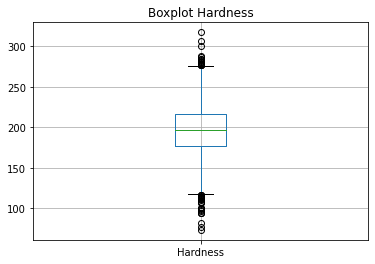

In [84]:
ax = df.boxplot(["Hardness"])
ax.set_title("Boxplot Hardness")
plt.show()

In [85]:
H_0 = "nilai rata-rata Hardness bernilai 205"
H_1 = "nilai rata-rata Hardness tidak sama dengan 205"

print("Langkah 1: Hipotesis H_0 yang kami ambil ialah mu_0 = 205")
print("Langkah 2: Hipotesis H_1 yang kami ambil ialah mu_0 != 205")
print("Langkah 3: Tingkat signifikan a yang kami ambil ialah 0.05")
a = 0.05
print("a =", a)
print("Langkah 4: Uji statistik yang sesuai ialah dengan mengambil z = (mean - mu_0)/(std/(n**0.5)), ")
print("karena mean dan std populasi diketahui. Serta karena H_1 ialah mu_0 != 116, maka daerah kritis ialah z > z_a/2 atau z < -z_a/2")
z_adiv2 = st.norm.ppf(.975)
print("z_a/2 =",z_adiv2)
print("Langkah 5:")
mu_0 = 205
mean = df["Hardness"].mean()
std = df["Hardness"].std()
n = len(df["Hardness"])
print("xbar =", mean, ", std =", std, ", n =", n)
z = (mean - mu_0)/(std/(n**0.5))
print("z =",z)
p = 2*(1-st.norm.cdf(z))
print("p-value =", p)
print("Langkah 6:")
if (p < a):
    print("Karena berada dalam daerah kritis, hipotesis H_0 ditolak sehingga " + H_1)
else:
    print("Karena tidak berada dalam daerah kritis, hipotesis H_0 diterima sehingga " + H_0)

Langkah 1: Hipotesis H_0 yang kami ambil ialah mu_0 = 205
Langkah 2: Hipotesis H_1 yang kami ambil ialah mu_0 != 205
Langkah 3: Tingkat signifikan a yang kami ambil ialah 0.05
a = 0.05
Langkah 4: Uji statistik yang sesuai ialah dengan mengambil z = (mean - mu_0)/(std/(n**0.5)), 
karena mean dan std populasi diketahui. Serta karena H_1 ialah mu_0 != 116, maka daerah kritis ialah z > z_a/2 atau z < -z_a/2
z_a/2 = 1.959963984540054
Langkah 5:
xbar = 195.96920903783524 , std = 32.643165859429864 , n = 2010
z = -12.403137170010732
p-value = 2.0
Langkah 6:
Karena tidak berada dalam daerah kritis, hipotesis H_0 diterima sehingga nilai rata-rata Hardness bernilai 205


c. Nilai Rata-rata 100 baris pertama kolom Solids bukan 21900?

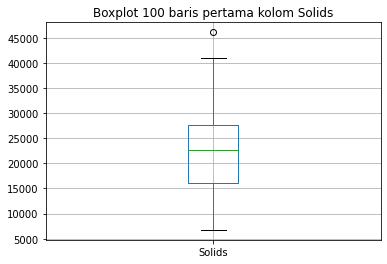

In [86]:
ax = df.loc[:99].boxplot(["Solids"])
ax.set_title("Boxplot 100 baris pertama kolom Solids")
plt.show()

In [87]:
H_0 = "rata-rata 100 baris pertama kolom Solids bernilai 21900"
H_1 = "rata-rata 100 baris pertama kolom Solids bukan 21900"

print("Langkah 1: Hipotesis H_0 yang kami ambil ialah mu_0 = 21900")
print("Langkah 2: Hipotesis H_1 yang kami ambil ialah mu_0 != 21900")
print("Langkah 3: Tingkat signifikan a yang kami ambil ialah 0.05")
a = 0.05
print("a =", a)
print("Langkah 4: Uji statistik yang sesuai ialah dengan mengambil t = (mean - mu_0)/(s/(n**0.5)), ")
print("karena std tidak diketahui. Serta karena H_1 ialah p < 0.05, maka daerah kritis ialah t > t_a dan t < -t_a")
v = 99
print("derajat kebebasan =", v)
t_adiv2 = st.t.ppf(.95, v)
print("t_a/2 =",t_adiv2)
print("Langkah 5:")
mu_0 = 21900
mean = df["Solids"][:100].mean()
s = df["Solids"][:100].std()
n = 100
print("xbar =", mean, ", s =", s, ", n =", n)
t = (mean - mu_0)/(s/(n**0.5))
print("t =",t)
p = 2*(1-st.t.cdf(t, v))
print("p-value =", p)
print("Langkah 6:")
if (p < a):
    print("Karena berada dalam daerah kritis, hipotesis H_0 ditolak sehingga " + H_1)
else:
    print("Karena tidak berada dalam daerah kritis, hipotesis H_0 diterima sehingga " + H_0)

Langkah 1: Hipotesis H_0 yang kami ambil ialah mu_0 = 21900
Langkah 2: Hipotesis H_1 yang kami ambil ialah mu_0 != 21900
Langkah 3: Tingkat signifikan a yang kami ambil ialah 0.05
a = 0.05
Langkah 4: Uji statistik yang sesuai ialah dengan mengambil t = (mean - mu_0)/(s/(n**0.5)), 
karena std tidak diketahui. Serta karena H_1 ialah p < 0.05, maka daerah kritis ialah t > t_a dan t < -t_a
derajat kebebasan = 99
t_a/2 = 1.6603911559963895
Langkah 5:
xbar = 22347.334446383426 , s = 7935.967706199006 , n = 100
t = 0.5636797715721551
p-value = 0.5742467134052605
Langkah 6:
Karena tidak berada dalam daerah kritis, hipotesis H_0 diterima sehingga rata-rata 100 baris pertama kolom Solids bernilai 21900


d. Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10%?

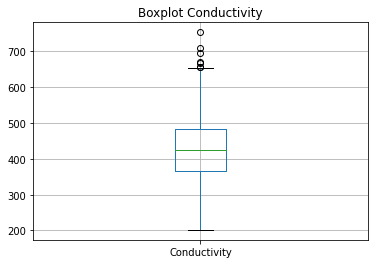

In [88]:
ax = df.boxplot(["Conductivity"])
ax.set_title("Boxplot Conductivity")
plt.show()

In [89]:
H_0 = "Proporsi nilai Conductivity yang lebih dari 450, adalah 10%"
H_1 = "Proporsi nilai Conductivity yang lebih dari 450, tidak sama dengan 10%"

print("Langkah 1: Hipotesis H_0 yang kami ambil ialah p = 0.1")
print("Langkah 2: Hipotesis H_1 yang kami ambil ialah p != 0.1")
print("Langkah 3: Tingkat signifikan a yang kami ambil ialah 0.05")
a = 0.05
print("a =", a)
print("Langkah 4: Uji statistik yang sesuai ialah dengan mengambil z = (x - n*p0)/((n*p0*q0)**0.5), ")
print("karena mean dan std populasi diketahui. Serta karena H_1 ialah p != 0.1, maka daerah kritis ialah z > z_a/2 atau z < -z_a/2")
z_adiv2 = st.norm.ppf(.975)
print("z_a/2 =",z_adiv2)
print("Langkah 5:")
x = 0
n = len(df["Conductivity"])
for i in range (n):
    if(df["Conductivity"][i] > 450):
        x += 1
p0 = 0.10
q0 = 1 - p0
print("x =", x, ", p0 =", p0, ", q0 =", q0)
z = (x - n*p0)/((n*p0*q0)**0.5)
print("z =",z)
p = 2*(1-st.norm.cdf(z))
print("p-value =", p)
print("Langkah 6:")
if (p < a):
    print("Karena berada dalam daerah kritis, hipotesis H_0 ditolak sehingga " + H_1)
else:
    print("Karena tidak berada dalam daerah kritis, hipotesis H_0 diterima sehingga " + H_0)

Langkah 1: Hipotesis H_0 yang kami ambil ialah p = 0.1
Langkah 2: Hipotesis H_1 yang kami ambil ialah p != 0.1
Langkah 3: Tingkat signifikan a yang kami ambil ialah 0.05
a = 0.05
Langkah 4: Uji statistik yang sesuai ialah dengan mengambil z = (x - n*p0)/((n*p0*q0)**0.5), 
karena mean dan std populasi diketahui. Serta karena H_1 ialah p != 0.1, maka daerah kritis ialah z > z_a/2 atau z < -z_a/2
z_a/2 = 1.959963984540054
Langkah 5:
x = 745 , p0 = 0.1 , q0 = 0.9
z = 40.446376131589325
p-value = 0.0
Langkah 6:
Karena berada dalam daerah kritis, hipotesis H_0 ditolak sehingga Proporsi nilai Conductivity yang lebih dari 450, tidak sama dengan 10%


e. Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%?

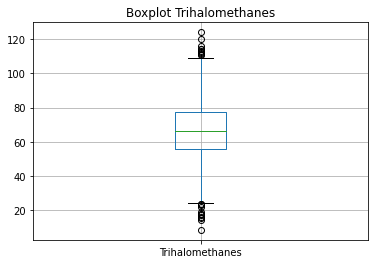

In [90]:
ax = df.boxplot(["Trihalomethanes"])
ax.set_title("Boxplot Trihalomethanes")
plt.show()

In [91]:
H_0 = "proporsi nilai Trihalomethanes yang kurang dari 40, adalah 5%"
H_1 = "proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%"

print("Langkah 1: Hipotesis H_0 yang kami ambil ialah p = 0.05")
print("Langkah 2: Hipotesis H_1 yang kami ambil ialah p < 0.05")
print("Langkah 3: Tingkat signifikan a yang kami ambil ialah 0.05")
a = 0.05
print("a =", a)
print("Langkah 4: Uji statistik yang sesuai ialah dengan mengambil z = (x - n*p0)/((n*p0*q0)**0.5), ")
print("karena mean dan std populasi diketahui. Serta karena H_1 ialah p < 0.05, maka daerah kritis ialah z < -z_a")
z_a = st.norm.ppf(.95)
print("z_a =",z_a)
print("Langkah 5:")
x = 0
n = len(df["Trihalomethanes"])
for i in range (n):
    if(df["Trihalomethanes"][i] < 40):
        x += 1
p0 = 0.05
q0 = 1 - p0
print("x =", x, ", p0 =", p0, ", q0 =", q0)
z = (x - n*p0)/((n*p0*q0)**0.5)
print("z =",z)
p = st.norm.cdf(z)
print("p-value =", p)
print("Langkah 6:")
if (p < a):
    print("Karena berada dalam daerah kritis, hipotesis H_0 ditolak sehingga " + H_1)
else:
    print("Karena tidak berada dalam daerah kritis, hipotesis H_0 diterima sehingga " + H_0)

Langkah 1: Hipotesis H_0 yang kami ambil ialah p = 0.05
Langkah 2: Hipotesis H_1 yang kami ambil ialah p < 0.05
Langkah 3: Tingkat signifikan a yang kami ambil ialah 0.05
a = 0.05
Langkah 4: Uji statistik yang sesuai ialah dengan mengambil z = (x - n*p0)/((n*p0*q0)**0.5), 
karena mean dan std populasi diketahui. Serta karena H_1 ialah p < 0.05, maka daerah kritis ialah z < -z_a
z_a = 1.6448536269514722
Langkah 5:
x = 106 , p0 = 0.05 , q0 = 0.95
z = 0.5628826416670959
p-value = 0.7132425995092373
Langkah 6:
Karena tidak berada dalam daerah kritis, hipotesis H_0 diterima sehingga proporsi nilai Trihalomethanes yang kurang dari 40, adalah 5%


## Nomor 5
Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing dan menampilkan
juga boxplotnya untuk kolom/bagian yang bersesuaian.

a. Data kolom Sulfate dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?

Misal:

$A_1$: Data Sulfate bagian awal kolom

$A_2$: Data Sulfate bagian akhir kolom

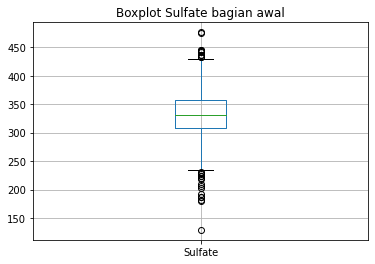

In [92]:
ax = df.loc[:1004].boxplot(["Sulfate"])
ax.set_title("Boxplot Sulfate bagian awal")
plt.show()

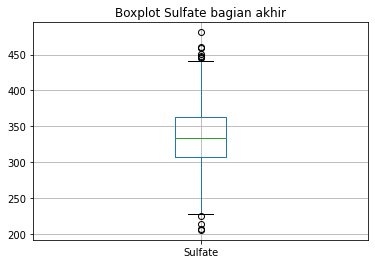

In [93]:
ax = df.loc[1005:].boxplot(["Sulfate"])
ax.set_title("Boxplot Sulfate bagian akhir")
plt.show()

1. Menentukan hipotesis nol $H_0$

$H_0$: $\mu_{A_1} = \mu_{A_2}$

Hipotesis nol yang ditetapkan adalah rata-rata data bagian awal kolom sama dengan rata-rata data bagian akhir kolom.

2. Menentukan hipotesis alternatif $H_1$

$H_1$: $\mu_{A_1} \neq \mu_{A_2}$

Hipotesis alternatif yang ditetapkan adalah rata-rata data bagian awal kolom tidak sama dengan rata-rata data bagian akhir kolom. Hal ini berarti rata-rata $A_1$ dapat lebih besar atau lebih kecil dari rata-rata $A_2$.

3. Menentukan Tingkat signifikansi $\alpha$

$\alpha = 0.05$

4. Menentukan tes statistik, dilakukan dengan **t-distribution** atau disebut juga Student's t-test. Daerah kritisnya diberikan sebagai berikut:
$$ t < -t_{\alpha/2}(v) \quad or \quad t > t_{\alpha/2}(v)$$ 
$v =$ derajat kebebasan $= n_{A_1} + n_{A_2} - 2$

Hitung v

$n_{A_1} = 1005$

$n_{A_2} = 1005$

$v = 1005 + 1005 - 2 = 2008$

Cari batasan daerah kritis dengan bantuan modul ```scipy.stats```:

In [94]:
from scipy.stats import t

# rumus: t.ppf(alpha/2, v)
a = t.ppf(0.025, 2008)
print("Batas bawah :", round(a, 4))
print("Batas atas :", round(-a, 4))

Batas bawah : -1.9611
Batas atas : 1.9611


Didapatkan daerah kritisnya adalah $ t < -1.9611 \quad or \quad t > 1.9611$

5. Menghitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan.
Nilai $t$ harus berada di luar daerah kritis supaya $H_0$ diterima. Rumus $t$ diberikan sebagai berikut:
$$\Large t = \Large\frac{(\bar{X_1} - \bar{X_2})-(\mu_1 - \mu_2)}{\sqrt{\Large\frac{s_1^2}{\Large n_{1}} + \Large\frac{s_2^2}{\Large n_{2}}}}$$
$\bar{X_1}$ : rata-rata sampel $A_1$

$\bar{X_2}$ : rata-rata sampel $A_2$

$\mu_1$ : rata-rata populasi $A_1$

$\mu_2$ : rata-rata populasi $A_2$

$S_1^2$ : variansi sampel $A_1$

$S_2^2$ : variansi sampel $A_2$

Dari hipotesis, $\mu_{A_1} = \mu_{A_2}$ maka $\mu_{A_1} - \mu_{A_2} = 0$.

Cari nilai $\bar{X_1}$, $\bar{X_2}$, $S_1^2$, dan $S_2^2$

In [95]:
x1 = df.loc[:1004, "Sulfate"].mean()
x2 = df.loc[1005:, "Sulfate"].mean()
s1 = df.loc[:1004, "Sulfate"].var()
s2 = df.loc[1005:, "Sulfate"].var()
print("Rata-rata A1 :", x1)
print("Rata-rata A2 :", x2)
print("Variansi A1 :", s1)
print("Variansi A2 :", s2)

Rata-rata A1 : 331.30532950549565
Rata-rata A2 : 335.11742332488245
Variansi A1 : 1708.3966020772502
Variansi A2 : 1682.7330644425087


Lakukan komputasi untuk mencari nilai $t$ dan p-value

In [96]:
from math import sqrt
from scipy.stats import t

t_value = (x1 - x2)  / sqrt((s1**2/1005) + (s2**2/1005))
p_value = 1 - t.cdf(t_value, 2008)
print("Nilai t :", round(t_value, 4))
print("p-value :", round(p_value, 4))

Nilai t : -0.0504
p-value : 0.5201


6. Pengambilan keputusan

Nilai $t$ yang didapat berada di luar daerah kritis ($-0.0504 > -1.9611$) dan p-value lebih besar dari $\alpha$ ($0.5201 > 0.05$). Oleh karena itu, keputusan yang diambil adalah **menerima $H_0$**. Kesimpulan yang didapat adalah ketika data kolom Sulfate dibagi dua sama rata, **rata-rata bagian awal kolom sama dengan rata-rata bagian akhir kolom**.

b. Data kolom OrganicCarbon dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.15?

Misal:

$A_1$: Data OrganicCarbon bagian awal kolom

$A_2$: Data OrganicCarbon bagian akhir kolom

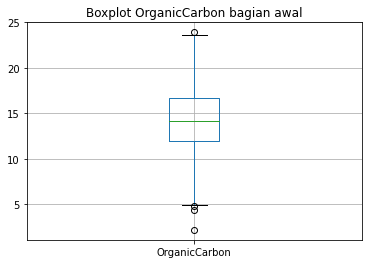

In [97]:
ax = df.loc[:1004].boxplot(["OrganicCarbon"])
ax.set_title("Boxplot OrganicCarbon bagian awal")
plt.show()

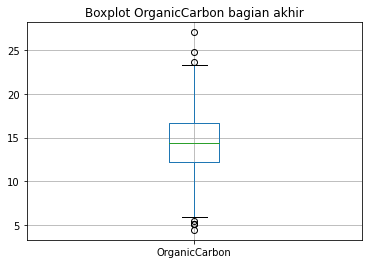

In [98]:
ax = df.loc[1005:].boxplot(["OrganicCarbon"])
ax.set_title("Boxplot OrganicCarbon bagian akhir")
plt.show()

1. Menentukan hipotesis nol $H_0$

$H_0$: $\mu_{A_1} = (\mu_{A_2} + 0.2)$

Hipotesis nol yang ditetapkan adalah rata-rata data bagian awal kolom sama dengan rata-rata data bagian akhir kolom ditambah $0.2$.

2. Menentukan hipotesis alternatif $H_1$

$H_1$: $\mu_{A_1} \neq (\mu_{A_2} + 0.2)$

Hipotesis alternatif yang ditetapkan adalah rata-rata data bagian awal kolom tidak sama dengan rata-rata data bagian akhir kolom ditambah $0.2$. Hal ini berarti rata-rata $A_1$ dapat lebih besar atau lebih kecil dari rata-rata $A_2$ ditambah $0.2$.

3. Menentukan tingkat signifikansi $\alpha$

$\alpha = 0.05$

4. Menentukan tes statistik, dilakukan dengan **t-distribution** atau disebut juga Student's t-test. Daerah kritisnya diberikan sebagai berikut:
$$ t < -t_{\alpha/2}(v) \quad or \quad t > t_{\alpha/2}(v)$$ 
$v =$ derajat kebebasan $= n_{A_1} + n_{A_2} - 2$

Hitung v

$n_{A_1} = 1005$

$n_{A_2} = 1005$

$v = 1005 + 1005 - 2 = 2008$

Cari batasan daerah kritis dengan bantuan modul ```scipy.stats```:

In [99]:
from scipy.stats import t

# rumus: t.ppf(alpha/2, v)
a = t.ppf(0.025, 2008)
print("Batas bawah :", round(a, 4))
print("Batas atas :", round(-a, 4))

Batas bawah : -1.9611
Batas atas : 1.9611


Didapatkan daerah kritisnya adalah $ t < -1.9611 \quad or \quad t > 1.9611$

5. Menghitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan.
Nilai $t$ harus berada di luar daerah kritis supaya $H_0$ diterima. Rumus $t$ diberikan sebagai berikut:
$$\Large t = \Large\frac{(\bar{X_1} - \bar{X_2})-(\mu_1 - \mu_2)}{\sqrt{\Large\frac{s_1^2}{\Large n_{1}} + \Large\frac{s_2^2}{\Large n_{2}}}}$$
$\bar{X_1}$ : rata-rata sampel $A_1$

$\bar{X_2}$ : rata-rata sampel $A_2$

$\mu_1$ : rata-rata populasi $A_1$

$\mu_2$ : rata-rata populasi $A_2$

$S_1^2$ : variansi sampel $A_1$

$S_2^2$ : variansi sampel $A_2$

Dari hipotesis, $\mu_{A_1} = \mu_{A_2}$ maka $\mu_{A_1} - \mu_{A_2} = 0$.

Cari nilai $\bar{X_1}$, $\bar{X_2}$, $S_1^2$, dan $S_2^2$

In [100]:
x1 = df.loc[:1004, "OrganicCarbon"].mean()
x2 = df.loc[1005:, "OrganicCarbon"].mean()
s1 = df.loc[:1004, "OrganicCarbon"].var()
s2 = df.loc[1005:, "OrganicCarbon"].var()
print("Rata-rata A1 :", x1)
print("Rata-rata A2 :", x2)
print("Variansi A1 :", s1)
print("Variansi A2 :", s2)

Rata-rata A1 : 14.253972723723393
Rata-rata A2 : 14.461907080372756
Variansi A1 : 11.230287224380323
Variansi A2 : 10.880581782847479


Lakukan komputasi untuk mencari nilai $t$ dan p-value

In [101]:
from math import sqrt
from scipy.stats import t

t_value = (x1 - x2)  / sqrt((s1**2/1005) + (s2**2/1005))
p_value = 1 - t.cdf(t_value, 2008)
print("Nilai t :", round(t_value, 4))
print("p-value :", round(p_value, 4))

Nilai t : -0.4216
p-value : 0.6633


6. Pengambilan keputusan

Nilai $t$ yang didapat berada di luar daerah kritis ($-0.4216 > -1.9611$) dan p-value lebih besar dari $\alpha$ ($0.6633 > 0.05$). Oleh karena itu, keputusan yang diambil adalah **menerima $H_0$**. Kesimpulan yang didapat adalah ketika data kolom Sulfate dibagi dua sama rata, **rata-rata bagian awal kolom lebih besar sejumlah 0.2 dibanding rata-rata bagian akhir kolom**.

c. Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya?

d.  Proporsi nilai bagian awal Turbidity yang lebih dari 4, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Turbidity ?

e. Bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya?


Test korelasi: tentukan apakah setiap kolom non-target berkorelasi dengan kolom target,
dengan menggambarkan juga scatter plot nya. Gunakan correlation test.

## Nomor 6
Menentukan apakah kolom non-target berkorelasi dengan kolom target dan gambarkan scatter plot dengan correlation test

pH

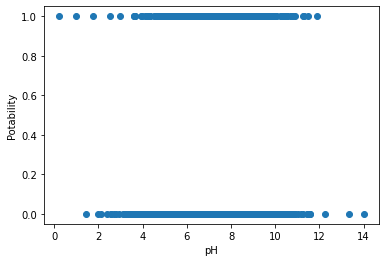

Correlation: 0.015475094408433464


In [102]:
import matplotlib.pyplot as plt

plt.scatter(x = df["pH"],y = df["Potability"])
plt.xlabel("pH")
plt.ylabel("Potability")
plt.show()

print("Correlation: " + str((df["pH"].corr(df["Potability"]))))

Hardness

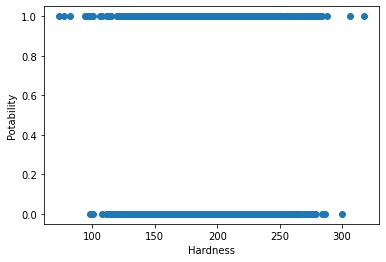

Correlation: -0.0014631528959479258


In [103]:
plt.scatter(x = df["Hardness"],y = df["Potability"])
plt.xlabel("Hardness")
plt.ylabel("Potability")
plt.show()

print("Correlation: " + str((df["Hardness"].corr(df["Potability"]))))

Solids

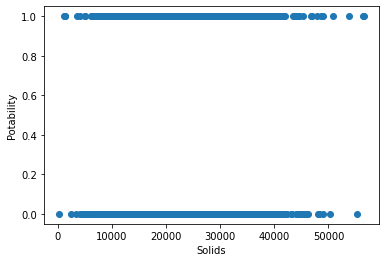

Correlation: 0.03897657818173469


In [104]:
plt.scatter(x = df["Solids"],y = df["Potability"])
plt.xlabel("Solids")
plt.ylabel("Potability")
plt.show()

print("Correlation: " + str((df["Solids"].corr(df["Potability"]))))

Chloramines

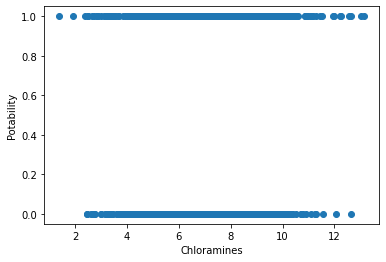

Correlation: 0.020778921840524097


In [105]:
plt.scatter(x = df["Chloramines"],y = df["Potability"])
plt.xlabel("Chloramines")
plt.ylabel("Potability")
plt.show()

print("Correlation: " + str((df["Chloramines"].corr(df["Potability"]))))

Sulfate

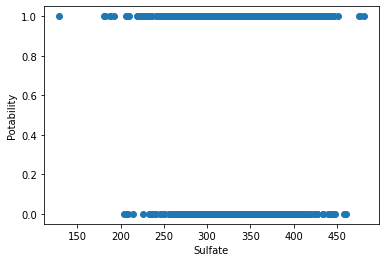

Correlation: -0.015703164419273774


In [106]:
plt.scatter(x = df["Sulfate"],y = df["Potability"])
plt.xlabel("Sulfate")
plt.ylabel("Potability")
plt.show()

print("Correlation: " + str((df["Sulfate"].corr(df["Potability"]))))

Conductivity

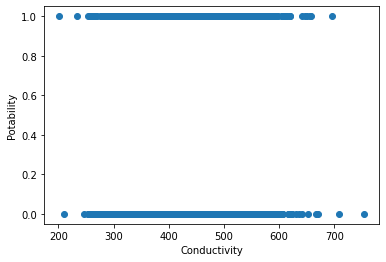

Correlation: -0.01625712011137708


In [107]:
plt.scatter(x = df["Conductivity"],y = df["Potability"])
plt.xlabel("Conductivity")
plt.ylabel("Potability")
plt.show()

print("Correlation: " + str((df["Conductivity"].corr(df["Potability"]))))

OrganicCarbon

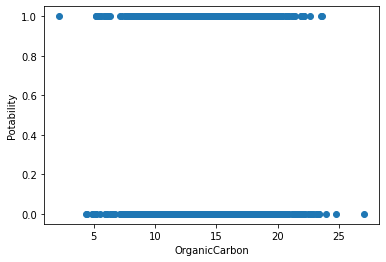

Correlation: -0.015488461910747283


In [108]:
plt.scatter(x = df["OrganicCarbon"],y = df["Potability"])
plt.xlabel("OrganicCarbon")
plt.ylabel("Potability")
plt.show()

print("Correlation: " + str((df["OrganicCarbon"].corr(df["Potability"]))))

Trihalomethanes

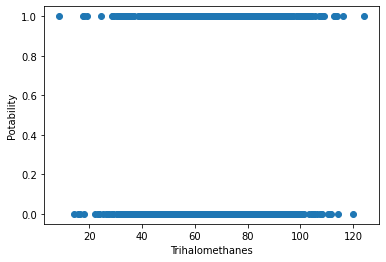

Correlation: 0.009236711064713023


In [109]:
plt.scatter(x = df["Trihalomethanes"],y = df["Potability"])
plt.xlabel("Trihalomethanes")
plt.ylabel("Potability")
plt.show()

print("Correlation: " + str((df["Trihalomethanes"].corr(df["Potability"]))))

Turbidity

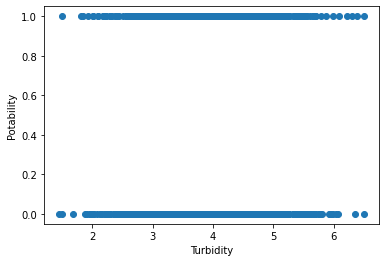

Correlation: 0.022331042640622675


In [110]:
plt.scatter(x = df["Turbidity"],y = df["Potability"])
plt.xlabel("Turbidity")
plt.ylabel("Potability")
plt.show()

print("Correlation: " + str((df["Turbidity"].corr(df["Potability"]))))